# 1. Loading dataset

In [610]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('spam.csv')

# 2. Reading dataset's information

In [611]:
# reading 5 random samples from the dataset
dataset.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2482,ham,Pansy! You've been living in a jungle for two ...,NaN,NaN,NaN
2330,ham,Long beach lor. Expected... U having dinner now?,NaN,NaN,NaN
678,ham,Cause I'm not freaky lol,NaN,NaN,NaN
4097,ham,I think just yourself ��_Thanks and see you tomo,NaN,NaN,NaN
4424,ham,Just now saw your message.it k da:),NaN,NaN,NaN


In [612]:
# general view of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [613]:
# detail view of a sample from the dataset
dataset.sample(1).values


array([['ham',
        'Ever green quote ever told by Jerry in cartoon \\A Person Who Irritates u Always Is the one Who Loves u Vry Much But Fails to Express It...!..!! :-) :-) gud nyt"',
        nan, nan, nan]], dtype=object)

# 3. Data Cleaning

In [614]:
# removing unrequired cloumns from the data
dataset.drop(columns=['Unnamed: 2',"Unnamed: 3","Unnamed: 4"],inplace=True)

In [615]:
# after dropping the unrequired columns
dataset.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [616]:
# renaming the columns in the dataset
dataset.rename(columns={"v1":"target","v2":"message"},inplace=True)

In [617]:
# after renaming
dataset

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [618]:
# encoding the target column with 0 for ham and 1 for spam
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset["target"]=encoder.fit_transform(dataset['target'])

In [619]:
# after encoding
dataset.sample(5)

,target,message
4865,0,"Oh! Shit, I thought that was your trip! Looooo..."
1388,0,Oh k.i think most of wi and nz players unsold.
2854,0,Your gonna be the death if me. I'm gonna leave...
5057,0,"Geeeee ... Your internet is really bad today, ..."
1810,0,"Now, whats your house # again ? And do you hav..."


In [620]:
# checking missing value for target
dataset["target"].isnull().sum()

0

In [621]:
# checking missing value for message
dataset["message"].isnull().sum()

0

In [622]:
# checking duplicated values
dataset.duplicated().sum()

403

In [623]:
# remove the duplicated values and keep first one
dataset.drop_duplicates(keep="first",inplace=True)

In [624]:
# checking the presence of  the dupicated values
dataset.duplicated().sum()

0

In [625]:
# reading  dataset's information after removing duplicated data
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5169 non-null   int32 
 1   message  5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


# 4. Exploratory data analysis

In [626]:
# checking the presence of ham and spam in the dataset
dataset["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1ec8169a220>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

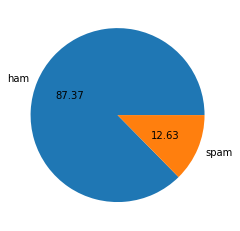

In [627]:
# visualizaing in the presence of ham and spam in the dataset pichart
import matplotlib.pyplot as plt
%matplotlib inline

plt.pie(dataset["target"].value_counts(),labels=['ham',"spam"],autopct="%0.2f")

In [628]:
# counting number of characters
dataset['num_characters'] = dataset['message'].apply(len)

In [629]:
# visualizing number of characters
dataset.head()

,target,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [630]:
# num of words in message
import nltk
nltk.download('punkt')

dataset['num_words'] = dataset['message'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [631]:
dataset.head()

,target,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [632]:
# number of sentencs in message
dataset['num_sentences'] = dataset['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [633]:
dataset

,target,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [634]:
# statistical view of dataset
dataset[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [635]:
# statistical view of dataset accroding to ham
dataset[dataset['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [636]:
# statistical view of dataset accroding to spam
dataset[dataset['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

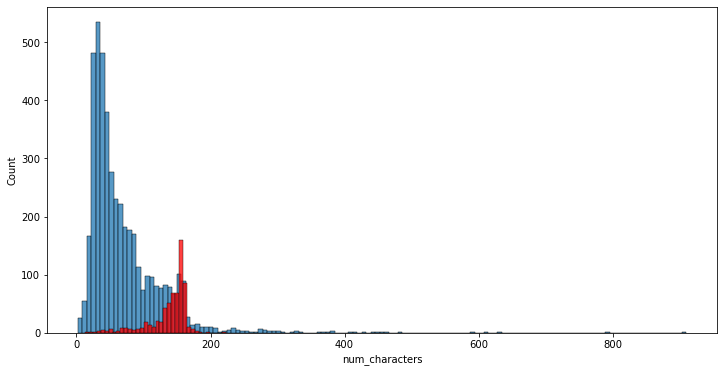

In [637]:
# visualizing num_characters accroding to target
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['target'] == 0]['num_characters'])
sns.histplot(dataset[dataset['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

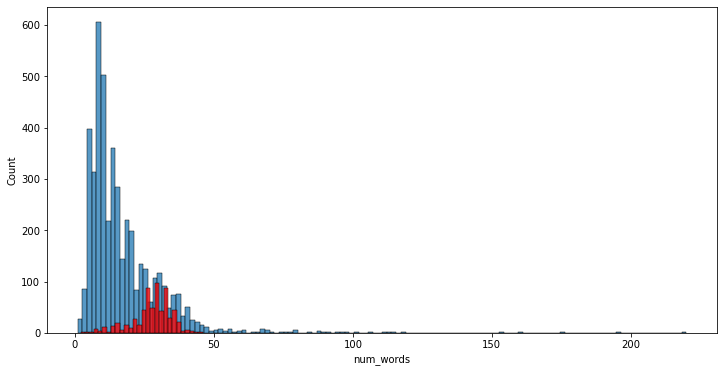

In [638]:
# visualizing num_words accroding to targe
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['target'] == 0]['num_words'])
sns.histplot(dataset[dataset['target'] == 1]['num_words'],color='red')

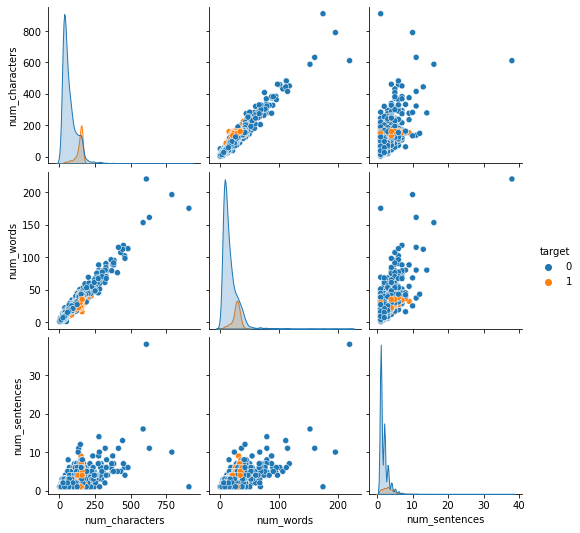

In [639]:
# visualizing dataset in pairplot
sns.pairplot(dataset,hue='target')

<AxesSubplot:>

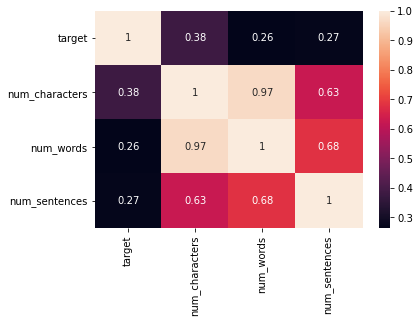

In [640]:
# visualizing in correlation between dataset
sns.heatmap(dataset.corr(),annot=True)

In [641]:
# download stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [642]:
# cleaning message 
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [643]:
dataset['transformed_text'] = dataset['message'].apply(transform_text)

In [644]:
dataset

,target,message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [645]:
# visulizing text
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

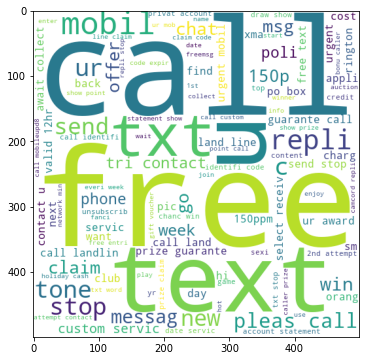

In [646]:
# visualizing text from message with class target
spam_wc = wc.generate(dataset[dataset['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

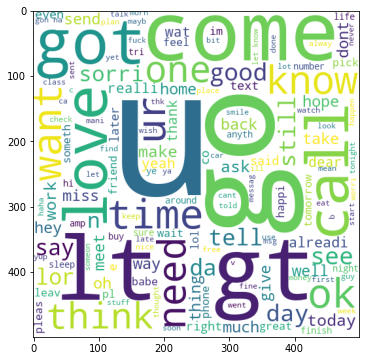

In [647]:
# visualizing text from message with class target
ham_wc = wc.generate(dataset[dataset['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [648]:
dataset.head()

,target,message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [649]:
spam_corpus = []
for msg in dataset[dataset['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


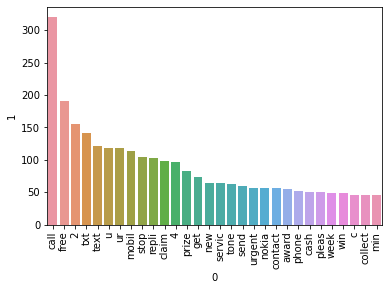

In [650]:
# visualizig top words in barplot accroding to spam
import seaborn as sns
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [651]:
ham_corpus = []
for msg in dataset[dataset['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


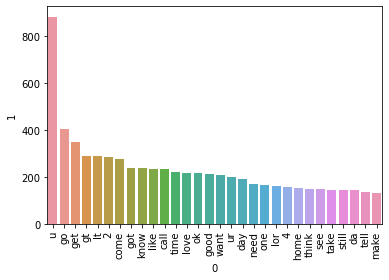

In [652]:
# visualizig top words in barplot accroding to ham
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 5. Data Preparing

In [659]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_features=3000)
tfidf = TfidfVectorizer(max_features=3000)

In [660]:
X_cv = cv.fit_transform(dataset['transformed_text']).toarray()
X_tf = tfidf.fit_transform(dataset['transformed_text']).toarray()
y = dataset['target'].values
X_cv.shape

(5169, 3000)

In [661]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# normal data
cv_X_train,cv_X_test,cv_y_train,cv_y_test = train_test_split(X_cv,y,test_size=0.2,random_state=2)
tf_X_train,tf_X_test,tf_y_train,tf_y_test = train_test_split(X_tf,y,test_size=0.2,random_state=2)

# scaling data
scaler = MinMaxScaler()
s_cv_X_train,s_cv_X_test,s_cv_y_train,s_cv_y_test = train_test_split(scaler.fit_transform(X_cv),y,test_size=0.2,random_state=2)
s_tf_X_train,s_tf_X_test,s_tf_y_train,s_tf_y_test = train_test_split(scaler.fit_transform(X_tf),y,test_size=0.2,random_state=2)


# 6. Desiging base model

In [662]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [663]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [664]:
mnb = MultinomialNB()
mnb.fit(tf_X_train,tf_y_train)
y_pred = mnb.predict(tf_X_test)
print(accuracy_score(tf_y_test,y_pred))
print(accuracy_score(tf_y_test,y_pred))

0.971953578336557
0.971953578336557


In [665]:
def basemodel_table(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return [accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred)]
    

In [666]:
base_model_info=pd.DataFrame(data=["accuracy","precision"],columns=["measure"])
base_model_info["GaussianNB c"]=pd.DataFrame(basemodel_table(gnb,cv_X_train,cv_X_test,cv_y_train,cv_y_test))
base_model_info["MultinomialNB c"]=pd.DataFrame(basemodel_table(mnb,cv_X_train,cv_X_test,cv_y_train,cv_y_test))
base_model_info["BernoulliNB c"]=pd.DataFrame(basemodel_table(bnb,cv_X_train,cv_X_test,cv_y_train,cv_y_test))
base_model_info["GaussianNB scaled c"]=pd.DataFrame(basemodel_table(gnb,s_cv_X_train,s_cv_X_test,s_cv_y_train,s_cv_y_test))
base_model_info["MultinomialNB scaled c"]=pd.DataFrame(basemodel_table(mnb,s_cv_X_train,s_cv_X_test,s_cv_y_train,s_cv_y_test))
base_model_info["BernoulliNB scaled c"]=pd.DataFrame(basemodel_table(bnb,s_cv_X_train,s_cv_X_test,s_cv_y_train,s_cv_y_test))
base_model_info["GaussianNB c"]=pd.DataFrame(basemodel_table(gnb,cv_X_train,cv_X_test,cv_y_train,cv_y_test))
base_model_info["MultinomialNB c"]=pd.DataFrame(basemodel_table(mnb,cv_X_train,cv_X_test,cv_y_train,cv_y_test))
base_model_info["BernoulliNB t"]=pd.DataFrame(basemodel_table(bnb,cv_X_train,cv_X_test,cv_y_train,cv_y_test))
base_model_info["GaussianNB scaled t"]=pd.DataFrame(basemodel_table(gnb,s_cv_X_train,s_cv_X_test,s_cv_y_train,s_cv_y_test))
base_model_info["MultinomialNB scaled t"]=pd.DataFrame(basemodel_table(mnb,s_cv_X_train,s_cv_X_test,s_cv_y_train,s_cv_y_test))
base_model_info["BernoulliNB scaled t"]=pd.DataFrame(basemodel_table(bnb,s_cv_X_train,s_cv_X_test,s_cv_y_train,s_cv_y_test))
base_model_info


,measure,GaussianNB c,MultinomialNB c,BernoulliNB c,GaussianNB scaled c,MultinomialNB scaled c,BernoulliNB scaled c,BernoulliNB t,GaussianNB scaled t,MultinomialNB scaled t,BernoulliNB scaled t
0,accuracy,0.874275,0.972921,0.983559,0.87234,0.976789,0.983559,0.983559,0.87234,0.976789,0.983559
1,precision,0.874275,0.972921,0.983559,0.87234,0.976789,0.983559,0.983559,0.87234,0.976789,0.983559


In [667]:
base_model_info.max(axis=1)

0    0.983559
1    0.983559
dtype: float64

# 7. finding  Best Models 

In [668]:
!pip install xgboost

In [669]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [670]:
# random intialization of model
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=20, random_state=2)
abc = AdaBoostClassifier(n_estimators=20, random_state=2)
bc = BaggingClassifier(n_estimators=20, random_state=2)
etc = ExtraTreesClassifier(n_estimators=20, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=20,random_state=2)
xgb = XGBClassifier(n_estimators=20,random_state=2)
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [671]:
clfs.items()

dict_items([('SVC', SVC(gamma=1.0, kernel='sigmoid')), ('KN', KNeighborsClassifier()), ('NB', BernoulliNB()), ('DT', DecisionTreeClassifier(max_depth=5)), ('LR', LogisticRegression(penalty='l1', solver='liblinear')), ('RF', RandomForestClassifier(n_estimators=20, random_state=2)), ('AdaBoost', AdaBoostClassifier(n_estimators=20, random_state=2)), ('BgC', BaggingClassifier(n_estimators=20, random_state=2)), ('ETC', ExtraTreesClassifier(n_estimators=20, random_state=2)), ('GBDT', GradientBoostingClassifier(n_estimators=20, random_state=2)), ('xgb', XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=N

In [672]:

select_model=pd.DataFrame(data=["accuracy","precision"],columns=["measure"])


for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,tf_X_train,tf_X_test,tf_y_train,tf_y_test)
    select_model[name+" tf"]=pd.DataFrame([current_accuracy,current_precision])

                                                               

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,tf_X_train,tf_X_test,tf_y_train,tf_y_test)
    select_model[name+" tf"]=pd.DataFrame([current_accuracy,current_precision])

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,s_cv_X_train,s_cv_X_test,s_cv_y_train,s_cv_y_test)
    select_model[name+" cv s"]=pd.DataFrame([current_accuracy,current_precision])
                                                               

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,s_tf_X_train,s_tf_X_test,s_tf_y_train,s_tf_y_test)
    select_model[name+" tf s"]=pd.DataFrame([current_accuracy,current_precision])




C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:03:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [673]:
select_model=select_model.T
select_model.rename(columns={0:"accuracy",1:"precision"},inplace=True)
select_model.drop(index="measure",inplace=True)

In [674]:
select_model

,accuracy,precision
SVC tf,0.974855,0.974576
KN tf,0.905222,1.0
NB tf,0.983559,0.99187
DT tf,0.9294,0.835052
LR tf,0.95648,0.969697
RF tf,0.970019,0.973451
AdaBoost tf,0.94971,0.890909
BgC tf,0.951644,0.849206
ETC tf,0.974855,0.974576
GBDT tf,0.927466,0.909091


In [675]:
select_model.sort_values(by="precision",ascending=False)

,accuracy,precision
KN cv s,0.908124,1.0
KN tf,0.905222,1.0
NB tf,0.983559,0.99187
NB tf s,0.983559,0.99187
NB cv s,0.983559,0.99187
LR cv s,0.971954,0.990991
RF cv s,0.970986,0.982143
KN tf s,0.905222,0.97619
ETC tf s,0.974855,0.974576
SVC tf,0.974855,0.974576


# 8. Ensemble Modeling for getting better result

In [676]:
# best models
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = BernoulliNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1')


# Voting Classifier

In [677]:
voting1 = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc),("lr",lrc)],voting='hard')
voting1.fit(cv_X_train,cv_y_train)
y_pred = voting1.predict(cv_X_test)
print("Voting Accuracy",accuracy_score(cv_y_test,y_pred))
print("voting Precision",precision_score(cv_y_test,y_pred))


Voting Accuracy 0.9806576402321083
voting Precision 1.0


In [678]:
voting2 = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc),("lr",lrc)],voting='soft')
voting2.fit(cv_X_train,cv_y_train)
y_pred = voting2.predict(cv_X_test)
print("Voting Accuracy",accuracy_score(cv_y_test,y_pred))
print("voting Precision",precision_score(cv_y_test,y_pred))


Voting Accuracy 0.9806576402321083
voting Precision 0.9836065573770492


In [679]:
voting3 = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc),("lr",lrc)],voting='hard')
voting3.fit(tf_X_train,tf_y_train)
y_pred = voting3.predict(tf_X_test)
print("Voting Accuracy",accuracy_score(tf_y_test,y_pred))
print("voting Precision",precision_score(tf_y_test,y_pred))


Voting Accuracy 0.9787234042553191
voting Precision 1.0


In [680]:
voting4 = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc),("lr",lrc)],voting='soft')
voting4.fit(tf_X_train,tf_y_train)
y_pred = voting4.predict(tf_X_test)
print("Voting Accuracy",accuracy_score(tf_y_test,y_pred))
print("voting Precision",precision_score(tf_y_test,y_pred))


Voting Accuracy 0.9816247582205029
voting Precision 0.983739837398374


# Stacking Classifier


In [ ]:
from sklearn.ensemble import StackingClassifier
lrc = LogisticRegression(solver='liblinear', penalty='l1')
estimators=[('svm', svc), ('nb', mnb), ('et', etc),("LRC",lrc)]
final_estimator=RandomForestClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(cv_X_train,cv_y_train)
y_pred = clf.predict(cv_X_test)
print("Stacking Accuracy",accuracy_score(cv_y_test,y_pred))
print("Stacking Precision",precision_score(cv_y_test,y_pred))

In [ ]:
clf.fit(tf_X_train,tf_y_train)
y_pred = clf.predict(tf_X_test)
print("Stacking Accuracy",accuracy_score(tf_y_test,y_pred))
print("Stacking Precision",precision_score(tf_y_test,y_pred))

# 9. dummping model for  deployment

In [ ]:

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting1,open('model.pkl','wb'))